Consider Differentiated Thyroid Cancer Recurrence dataset which contains 13 clinicopathologic features aiming to predict recurrence of well differentiated thyroid cancer. The data set was collected in duration of 15 years and each patient was followed for at least 10 years. Apply the following ensemble approaches and compare their performances. Plot confusion matrix for all the algorithms.

a.	Random Forest

b.	Adaboost

c.	XGBoost




In [13]:
!pip install scikit-learn xgboost seaborn matplotlib

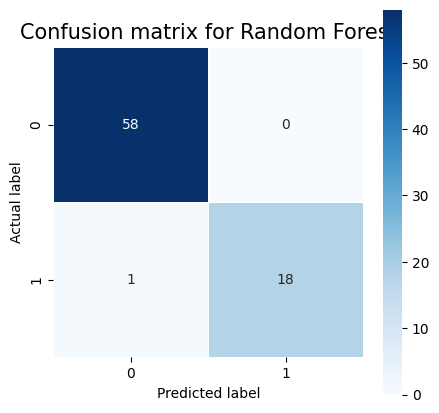

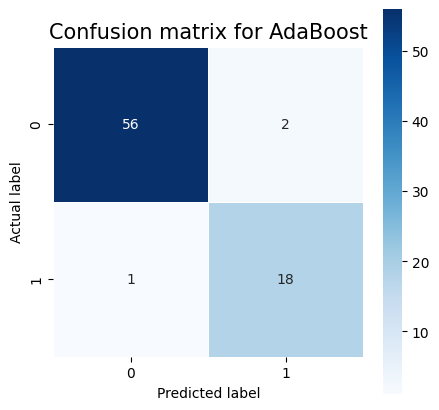

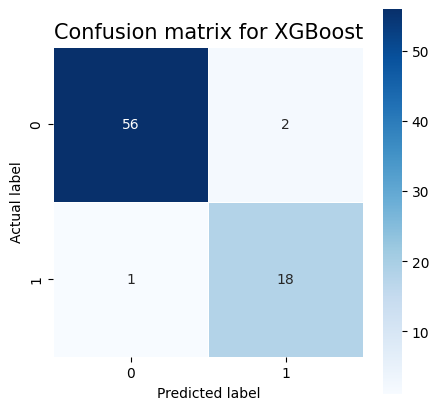

In [15]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming that `df` is your DataFrame
df = pd.read_csv('/content/Thyroid_Diff.csv')

# Convert categorical variables to numeric using label encoding
le = LabelEncoder()
categorical_features = ['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred']
for feature in categorical_features:
    df[feature] = le.fit_transform(df[feature])

# Define your feature set and target variable
X = df.drop('Recurred', axis=1)
y = df['Recurred']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Fit the models and plot confusion matrices
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title(f'Confusion matrix for {name}', size = 15)
    plt.show()
